In [361]:
import pandas as pd
from keras.src.metrics import MeanAbsoluteError, MeanSquaredError

df = pd.read_csv('Clean_Dataset.csv')

In [362]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Airline

In [363]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

### Source_City


In [364]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

### Destination

In [365]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [366]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [367]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [368]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [369]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [370]:
df['duration'].min()

0.83

In [371]:
df['duration'].max()

49.83

In [372]:
df['duration'].median()

11.25

## Preprocessing

In [373]:
df =  df.drop('Unnamed: 0', axis=1)
df =  df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x =='Business' else 0)

In [374]:
df.stops = pd.factorize(df.stops)[0]


In [375]:
df = df.join(pd.get_dummies(df.airline,  prefix='airline')).drop('airline' , axis=1)
df = df.join(pd.get_dummies(df.source_city,  prefix='source')).drop('source_city' , axis=1)
df = df.join(pd.get_dummies(df.destination_city,  prefix='dest')).drop('destination_city' , axis=1)
df = df.join(pd.get_dummies(df.arrival_time,  prefix='arrival')).drop('arrival_time' , axis=1)
df = df.join(pd.get_dummies(df.departure_time,  prefix='departure')).drop('departure_time' , axis=1)


In [376]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Training Regression Model


In [377]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x , y = df.drop('price' , axis=1) , df.price

In [378]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2)


In [379]:
reg = RandomForestRegressor(n_jobs=-1 )

reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [380]:
reg.score(x_test, y_test)

0.9849962709340432

In [381]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
import math

In [382]:
y_pred  = reg.predict(x_test)

print('--------------------------')

print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RISE: {math.sqrt(mean_squared_error(y_test, y_pred))}')


--------------------------
R2: 0.9849962709340432
MAE: 1082.5943766807784
MSE: 7733424.523169018
RISE: 2780.903544384274


Text(0.5, 1.0, 'Prediction vs Actual Flight Price')

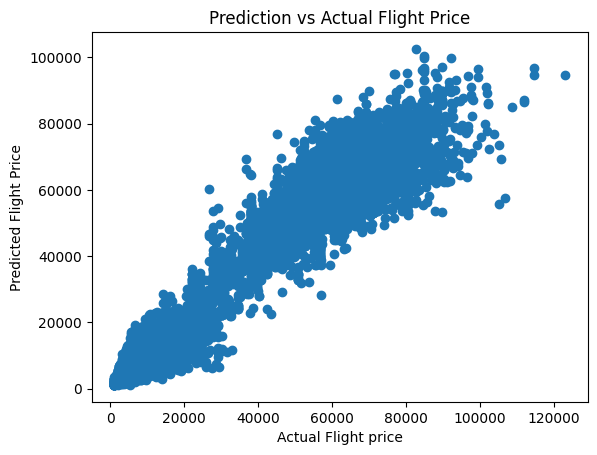

In [383]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Flight Price')

In [384]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [385]:
importances = dict(zip(reg.feature_names_in_ , reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)


In [386]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

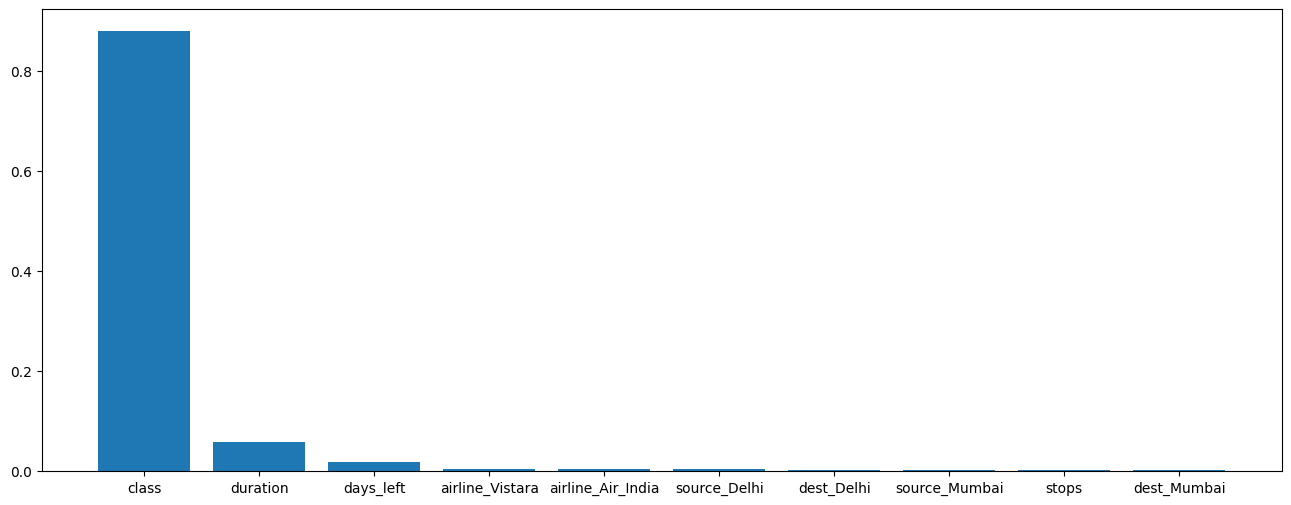

In [387]:
plt.figure(figsize = (16,6))
plt.bar([x[0] for x in sorted_importances[:10]] , [x[1] for x in sorted_importances[:10]])
        

### Hyper Parameter


In [388]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np

# Generate a random regression problem
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
reg = RandomForestRegressor(n_jobs=-1, random_state=42)

# Define the parameter grid to sample from during RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    reg, 
    param_distributions, 
    n_iter=10,  # Number of different combinations to try
    cv=5,       # Number of folds in cross-validation
    verbose=2,  # Print out progress
    random_state=42,  # For reproducibility
    n_jobs=-1   # Use all available cores
)

# Fit the model
random_search.fit(x_train, y_train)

# Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters found by RandomizedSearchCV:", best_params)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test set score:", test_score)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters found by RandomizedSearchCV: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}
Test set score: 0.823583496689698


In [389]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid with valid options for max_features
param_grid = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'sqrt', 'log2']  # Removed 'auto'
}

# Initialize the RandomForestRegressor
reg = RandomForestRegressor(n_jobs=-1)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=reg,
    param_distributions=param_grid,
    n_iter=2,  # Number of iterations
    cv=3,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Metric for evaluating the model
    verbose=2,
    random_state=10,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model
random_search.fit(x_train, y_train)

# Retrieve the best estimator
best_regressor = random_search.best_estimator_

# Output the best parameters
print("Best Parameters found by RandomizedSearchCV:", random_search.best_params_)

# You can now use best_regressor to make predictions or evaluate further


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters found by RandomizedSearchCV: {'max_depth': 30, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 257}


In [390]:
best_regressor.score(x_test,y_test)

0.8206497841428034

In [391]:
y_pred = best_regressor.predict(x_test)

print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RISE: {math.sqrt(mean_squared_error(y_test, y_pred))}')



R2: 0.8206497841428034
MAE: 66.34452789558611
MSE: 6942.412860257938
RISE: 83.32114293657965


Text(0.5, 1.0, 'Prediction vs Actual Flight Price')

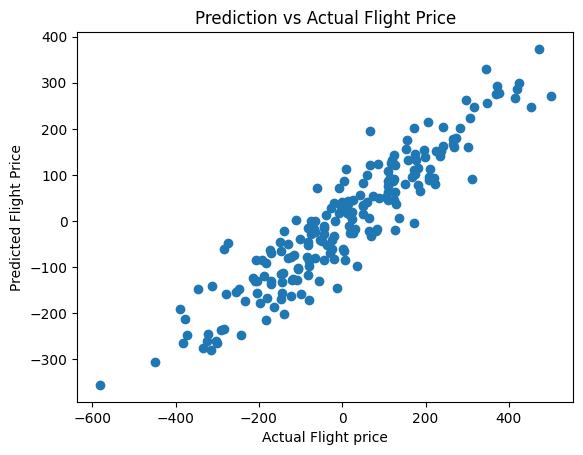

In [392]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Flight Price')

In [393]:
best_regressor.predict(x_test)

array([-245.55943226, -211.31653989,  274.80527143,  -46.56687838,
        154.53325313,   95.86972842,  265.76953869,  -49.90933331,
        -79.85272736, -233.54125385, -119.46627972, -190.3139203 ,
         71.23437677,  -28.34900145,    7.36841998,  122.64338747,
        -90.81122584,  -84.29909608,   12.94598597,  270.36427782,
       -169.84860461,  142.43472702,   80.53601113,   82.50317939,
        204.04456208,   31.28650415,  -24.79385957,  246.72819375,
         33.38454367,  -97.26688204,  -59.98513448,  -16.53423555,
        -32.06105348, -102.4746057 ,  112.85805685,  -63.21137392,
       -170.58180138,  248.34045643,   55.48565473,  110.69305948,
       -156.3198557 ,   51.36138864, -144.08496377,  -61.37100961,
        -15.71355631,   40.63275587, -259.85625729,   77.92025522,
         71.68302992, -115.00344127,   -0.55933331,  -19.60113515,
        -46.30698476, -355.20338547,  175.00020199,  256.38261971,
         44.91867762,  -85.09615472,  -40.83902177,  -84.17714